In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
data = pd.read_csv('shl_enhanced_dataset.csv')
data.head()


,job_role,experience_years,skill_level,education_level,industry,region,recommended_assessment
0,UX Designer,5,High,Bachelors,Finance,North America,Personality
1,Product Manager,3,High,Masters,Customer Service,Australia,Cognitive Ability
2,Sales Manager,7,Low,High School,Design,North America,Behavioral
3,Data Analyst,3,Medium,Masters,Marketing,Australia,Cognitive Ability
4,Customer Support,1,Medium,Masters,Marketing,Asia,Personality


In [29]:
# Initialize encoders
le_job = LabelEncoder()
le_skill = LabelEncoder()
le_assessment = LabelEncoder()

# Encode categorical columns
data['job_role_encoded'] = le_job.fit_transform(data['job_role'])
data['skill_level_encoded'] = le_skill.fit_transform(data['skill_level'])
data['assessment_encoded'] = le_assessment.fit_transform(data['recommended_assessment'])

# Final dataset
print("\nEncoded Data:")
print(data[['job_role', 'experience_years', 'skill_level', 'recommended_assessment',
            'job_role_encoded', 'skill_level_encoded', 'assessment_encoded']])


Encoded Data:
              job_role  experience_years skill_level recommended_assessment  \
0          UX Designer                 5        High            Personality   
1      Product Manager                 3        High      Cognitive Ability   
2        Sales Manager                 7         Low             Behavioral   
3         Data Analyst                 3      Medium      Cognitive Ability   
4     Customer Support                 1      Medium            Personality   
..                 ...               ...         ...                    ...   
195       Data Analyst                10      Medium      Cognitive Ability   
196   Business Analyst                 4        High      Cognitive Ability   
197   Business Analyst                 2      Medium      Cognitive Ability   
198  Finance Associate                 4      Medium             Behavioral   
199      Sales Manager                 3         Low             Behavioral   

     job_role_encoded  skill_level_e

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Features and target
X = data[['job_role_encoded', 'experience_years', 'skill_level_encoded']]
y = data['assessment_encoded']

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

✅ Model Accuracy: 80.00%

📋 Classification Report:
                   precision    recall  f1-score   support

       Behavioral       0.67      0.92      0.77        13
Cognitive Ability       0.85      0.73      0.79        15
      Personality       1.00      0.75      0.86        12

         accuracy                           0.80        40
        macro avg       0.84      0.80      0.81        40
     weighted avg       0.83      0.80      0.80        40



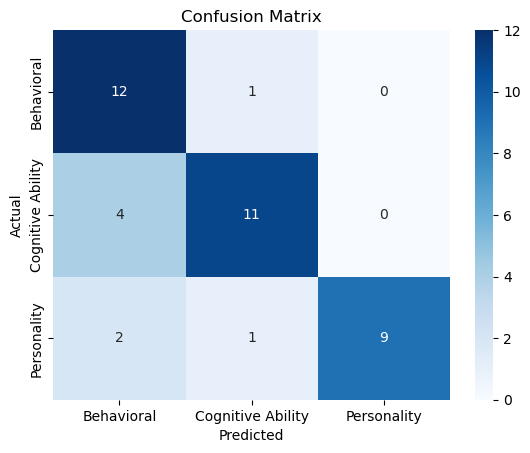

In [33]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test data
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=le_assessment.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=le_assessment.classes_, yticklabels=le_assessment.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [37]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearch
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# Best model
best_model = grid.best_estimator_

# Evaluate again
y_pred_best = best_model.predict(X_test)
print(f"🔥 Tuned Model Accuracy: {accuracy_score(y_test, y_pred_best) * 100:.2f}%")


🔥 Tuned Model Accuracy: 75.00%


In [40]:
!pip install xgboost

from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("⚡ XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb) * 100)


⚡ XGBoost Accuracy: 100.0


In [50]:
import joblib

# Replace 'model' with your actual variable name if different
joblib.dump(model, "shl_model.ipynb")

['shl_model.ipynb']

In [52]:
from IPython.display import FileLink
FileLink("shl_model.ipynb")


C:\Users\bhuva\SHL\shl_model.ipynb